# Proyecto de Inteligencia artificial

Ernesto Anaya - 190656 | Héctor G. T. Torres - 191589

### Pruebas con redes neuronales convolucionales 

- se realizaron pruebas con una CNN regular, una con dropout de 0.4, regularización l1 con 0.01, una con ambos hiperparámetros y cambiando el optimizador. 

In [1]:
import tensorflow as  tf
import numpy as np
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers
from keras.layers import Dense, Activation

# CNN sin regularización o dropout

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [4]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [6]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 18s 20ms/step - loss: 0.1627 - accuracy: 0.9490
Epoch 2/5
938/938 [==============================] - 18s 20ms/step - loss: 0.0460 - accuracy: 0.9858
Epoch 3/5
938/938 [==============================] - 18s 20ms/step - loss: 0.0314 - accuracy: 0.9904
Epoch 4/5
938/938 [==============================] - 18s 20ms/step - loss: 0.0244 - accuracy: 0.9925
Epoch 5/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0188 - accuracy: 0.9942


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0284 - accuracy: 0.9917


In [9]:
test_acc

0.9916999936103821

In [10]:
from sklearn.metrics import classification_report

Y_test = np.argmax(test_labels, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(test_images)
T_labels = np.argmax(test_labels,axis=1)
print(classification_report(Y_test, y_pred,  digits=6))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0   0.990872  0.996939  0.993896       980
           1   0.991213  0.993833  0.992521      1135
           2   0.997076  0.991279  0.994169      1032
           3   0.988212  0.996040  0.992110      1010
           4   0.997949  0.990835  0.994379       982
           5   0.989842  0.983184  0.986502       892
           6   0.994748  0.988518  0.991623       958
           7   0.991254  0.992218  0.991736      1028
           8   0.990788  0.993840  0.992312       974
           9   0.985192  0.989098  0.987141      1009

    accuracy                       0.991700     10000
   macro avg   0

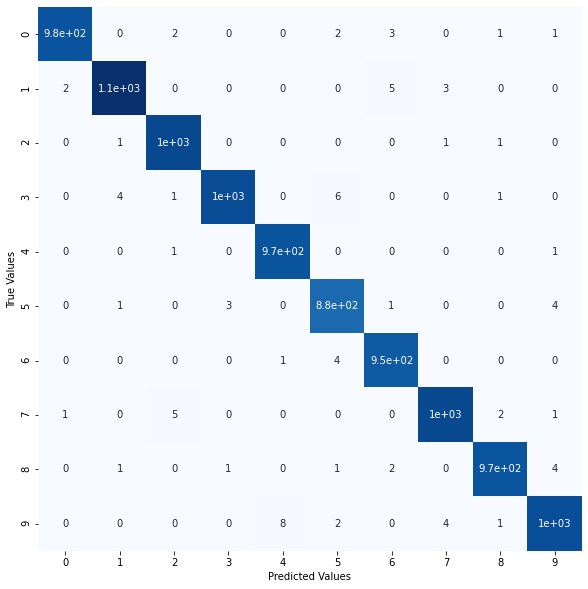

In [11]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(test_images) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(test_labels, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

es bloque para sacar la ROC, hay algo mal con Y_test y el formato de los argumetnos de roc_curve

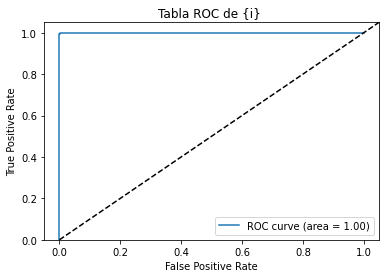

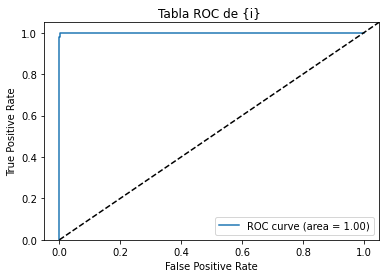

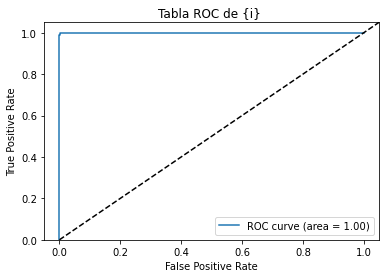

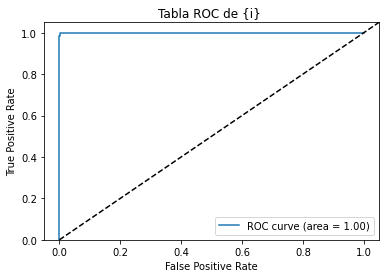

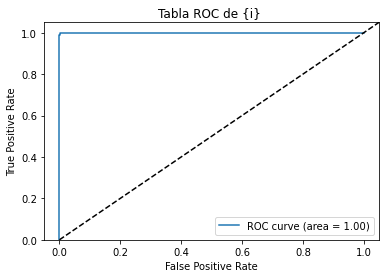

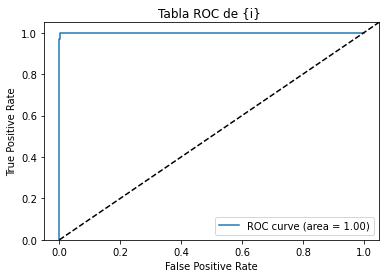

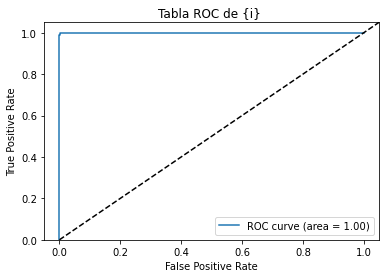

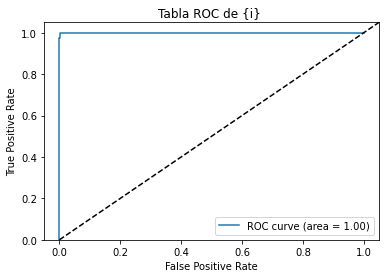

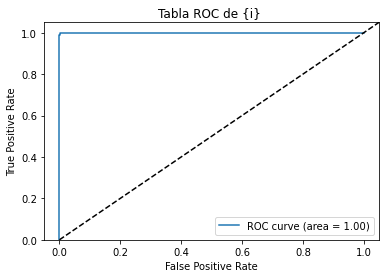

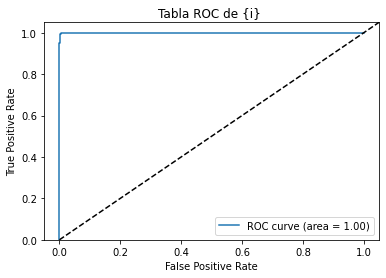

In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

#https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

#y_pred = model.predict(test_images) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


fpr=dict()
tpr=dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(10):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)'% roc_auc[2])
    plt.plot([0, 10], [0, 10], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Tabla ROC de {i} ')
    plt.legend(loc="lower right")
    plt.show()

## resultados

Los resultados nos muestran accuracy muy alto y mas que el de unan red neuronal convencional. Esta red muestra 99% accuracy pero hay muestras de overfitting. AUnque el test_accuracy es muy alto, sigue siendo menor al del conjunto de entrenamiento. El overfitting aquí es un poco mas complicado de detectar pero con esta primera prueba parece que redes convolucionales son una mejor alternativa para estos datos.

Las diferencias en porcentaje no son tan grandes pero  De acuerdo con el reporte de clasificación, no hay tanta diferencia entre la precisión de cada dígito. Tenemos el 9 con la precisión mas baja mientras que el 4 fue clasificado casi perfecto.

De acuerdo con la matriz de confusión, se puede observar como son muy pocos dígitos que se confunden. La red confunde 
el 9 con el 4. No sería muy raro ver errores de las redes de este estilo ya que los dígitos se parecen entre sí y clsifica varias veces el 9 como un 4. 

Para la tabla de ROC, es difícil obervar detalles ya que la precisión es muy alta.

# Versión con dropout

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [14]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10, activation='softmax'))

In [15]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 19s 20ms/step - loss: 0.3171 - accuracy: 0.9016
Epoch 2/5
938/938 [==============================] - 20s 21ms/step - loss: 0.1044 - accuracy: 0.9702
Epoch 3/5
938/938 [==============================] - 19s 20ms/step - loss: 0.0733 - accuracy: 0.9790
Epoch 4/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0605 - accuracy: 0.9825
Epoch 5/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0533 - accuracy: 0.9847


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.0347 - accuracy: 0.9890


In [17]:
test_acc

0.9890000224113464

In [18]:
from sklearn.metrics import classification_report

Y_test = np.argmax(test_labels, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(test_images)
T_labels = np.argmax(test_labels,axis=1)
print(classification_report(Y_test, y_pred,  digits=6))

              precision    recall  f1-score   support

           0   0.993884  0.994898  0.994391       980
           1   0.996457  0.991189  0.993816      1135
           2   0.990347  0.994186  0.992263      1032
           3   0.981409  0.993069  0.987205      1010
           4   0.996907  0.984725  0.990779       982
           5   0.975771  0.993274  0.984444       892
           6   0.996832  0.985386  0.991076       958
           7   0.978907  0.993191  0.985997      1028
           8   0.998951  0.977413  0.988064       974
           9   0.980218  0.982161  0.981188      1009

    accuracy                       0.989000     10000
   macro avg   0.988968  0.988949  0.988922     10000
weighted avg   0.989090  0.989000  0.989010     10000



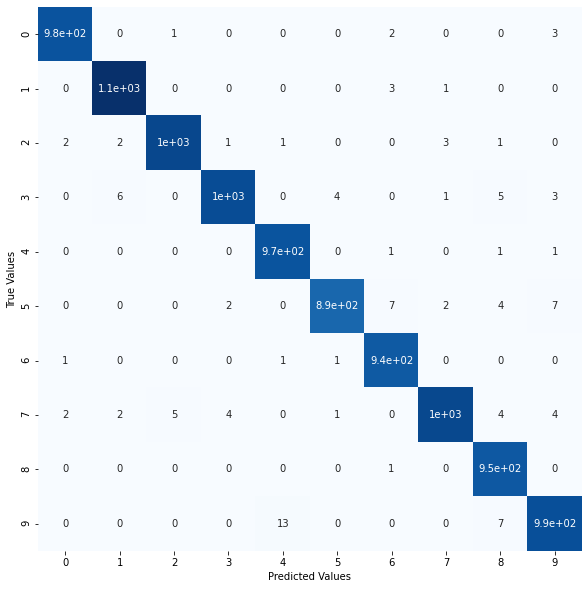

In [19]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(test_images) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(test_labels, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

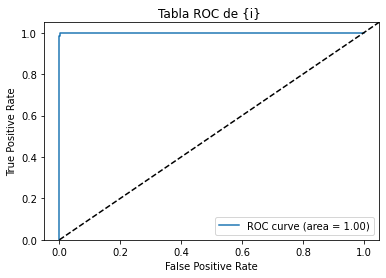

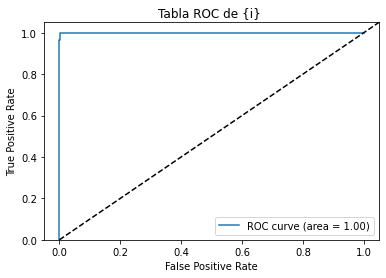

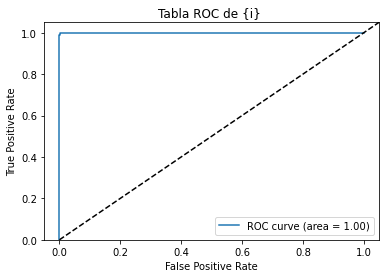

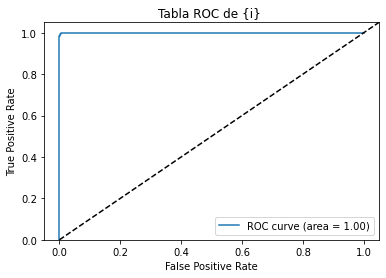

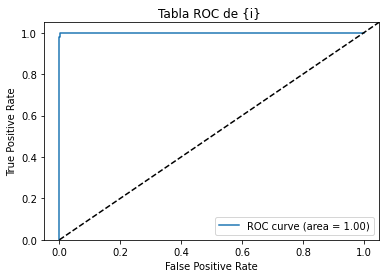

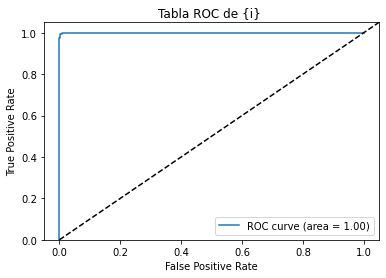

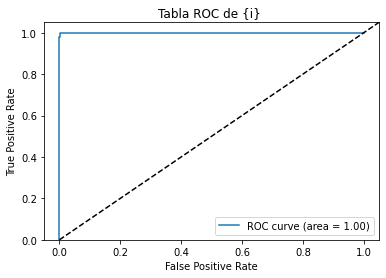

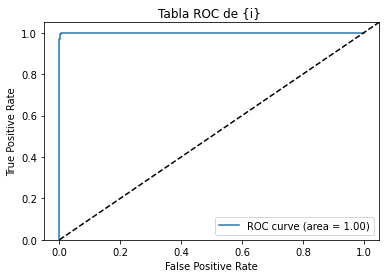

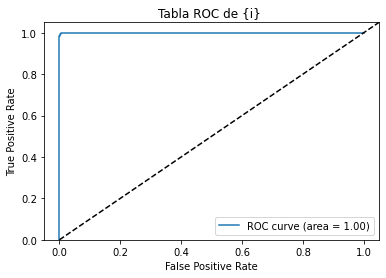

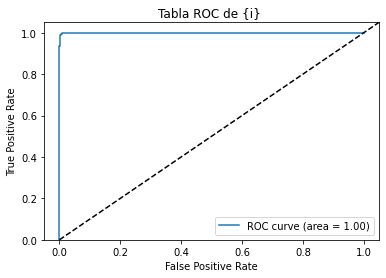

In [20]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

#https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

#y_pred = model.predict(test_images) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


fpr=dict()
tpr=dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(10):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)'% roc_auc[2])
    plt.plot([0, 10], [0, 10], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Tabla ROC de {i} ')
    plt.legend(loc="lower right")
    plt.show()

# Resultados

Cuando se implementa dropout, el cambio de precisión parece no ser tanto, sin embargo hay diferencias al medir los resultados. Empezando por la matriz de confusión, se puede ver que el 7 se confunde con el resto de los dígitos. Pero es probable que cambie gracias al dropout si decidimos entrenal la red otra vez (gracias a que se tiran neuronas al azar, la red puede cambiar d formas diferentes). Las tablas de ROC se parecen mucho entre ellas (incluyendo la del 7). Muestra que la red fue muy buena catalogando pero no nos dice mas detalle. 

Finalmente, al usar dropout se ve que el overfitting se disminuye y el test accuracy 98.9% es mayor que con el conjunto de entrenamiento (98.5%). A comparación de la pimera red, aquí no se puede observar un overfitting claro. 


# Versión con regularización

In [21]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'
                        , kernel_regularizer=tf.keras.regularizers.l1(l=0.01)
                       ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'
                        , kernel_regularizer=tf.keras.regularizers.l1(l=0.01)
                       ))

In [22]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [23]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 19s 20ms/step - loss: 1.5058 - accuracy: 0.8374
Epoch 2/5
938/938 [==============================] - 19s 21ms/step - loss: 0.6521 - accuracy: 0.9305
Epoch 3/5
938/938 [==============================] - 19s 20ms/step - loss: 0.5676 - accuracy: 0.9473
Epoch 4/5
938/938 [==============================] - 19s 20ms/step - loss: 0.5272 - accuracy: 0.9544
Epoch 5/5
938/938 [==============================] - 18s 20ms/step - loss: 0.5023 - accuracy: 0.9589


In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.4907 - accuracy: 0.9621


In [25]:
test_acc

0.9621000289916992

In [26]:
from sklearn.metrics import classification_report

Y_test = np.argmax(test_labels, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(test_images)
T_labels = np.argmax(test_labels,axis=1)
print(classification_report(Y_test, y_pred,  digits=6))

              precision    recall  f1-score   support

           0   0.964179  0.988776  0.976322       980
           1   0.976583  0.992070  0.984266      1135
           2   0.967131  0.940891  0.953831      1032
           3   0.976507  0.946535  0.961287      1010
           4   0.932432  0.983707  0.957384       982
           5   0.973804  0.958520  0.966102       892
           6   0.986052  0.959290  0.972487       958
           7   0.970209  0.950389  0.960197      1028
           8   0.926295  0.954825  0.940344       974
           9   0.950100  0.943508  0.946793      1009

    accuracy                       0.962100     10000
   macro avg   0.962329  0.961851  0.961901     10000
weighted avg   0.962482  0.962100  0.962104     10000



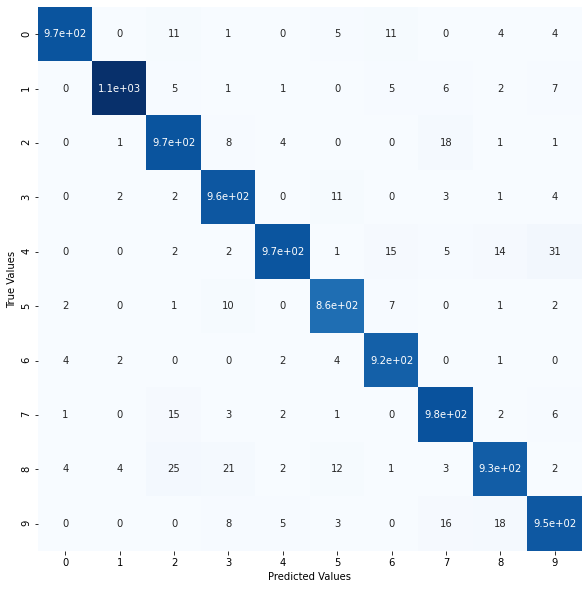

In [27]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(test_images) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(test_labels, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

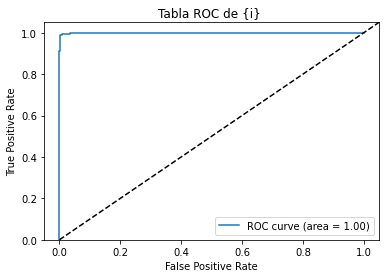

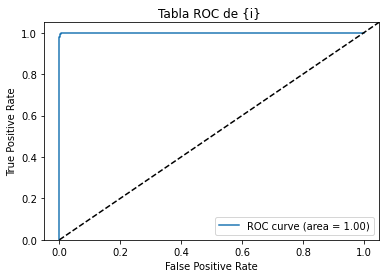

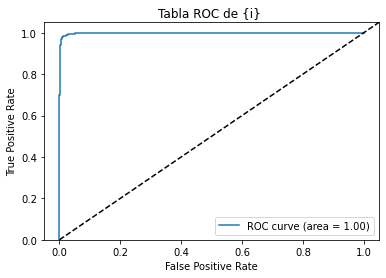

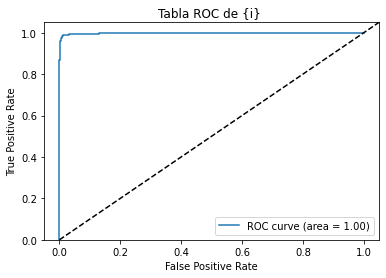

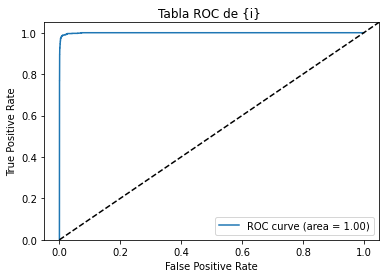

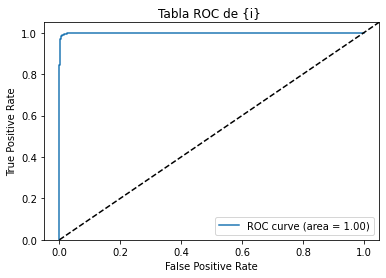

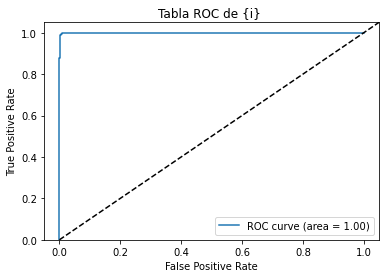

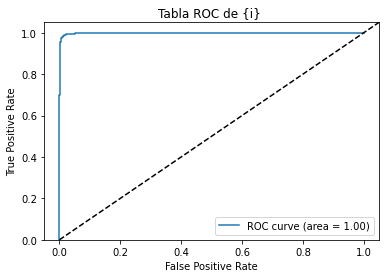

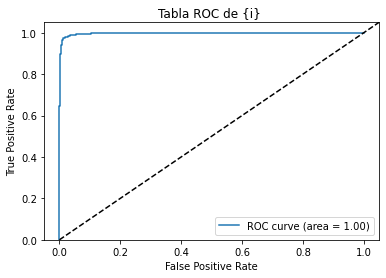

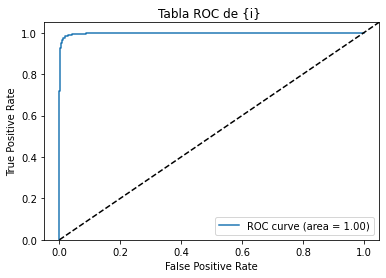

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

#https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

#y_pred = model.predict(test_images) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


fpr=dict()
tpr=dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(10):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)'% roc_auc[2])
    plt.plot([0, 10], [0, 10], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Tabla ROC de {i} ')
    plt.legend(loc="lower right")
    plt.show()

## Resultados

Al usar regularización, tenemos resultados mas diferentes a comparación de las otras 2 redes. La precisión del model baja a 96%. Ahora tnemos al modelo confundiendo un 4 con el 9 (se puede ver en la matriz de confusión), que da un golpa muy grande a la precsiión del 4, cuando antes la presición no variaba tanto entre dígitos. Aquí hay un dígito que llega a tener 93% de accuracy.

Para las tablas de ROC, se pueden ver diferencias mas sutiles pero aun son pequeñas. Pero reflejan la baja de precisión. Afortunadamente, no parece haber overfitting y de las pruebas anteriores, es la que tiene mejor test_accuracy a comparación del conjunto de entrenamiento.

# Versión con dropout y regularización

In [29]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'
                        , kernel_regularizer=tf.keras.regularizers.l1(l=0.01)
                       ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'
                        , kernel_regularizer=tf.keras.regularizers.l1(l=0.01)
                       ))

In [30]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10, activation='softmax'))

In [31]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 19s 21ms/step - loss: 1.7011 - accuracy: 0.7506
Epoch 2/5
938/938 [==============================] - 19s 20ms/step - loss: 0.8875 - accuracy: 0.8633
Epoch 3/5
938/938 [==============================] - 19s 21ms/step - loss: 0.7950 - accuracy: 0.8899
Epoch 4/5
938/938 [==============================] - 19s 21ms/step - loss: 0.7444 - accuracy: 0.9024
Epoch 5/5
938/938 [==============================] - 20s 21ms/step - loss: 0.7124 - accuracy: 0.9098


In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.5627 - accuracy: 0.9510


In [33]:
test_acc

0.9509999752044678

In [34]:
from sklearn.metrics import classification_report

Y_test = np.argmax(test_labels, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(test_images)
T_labels = np.argmax(test_labels,axis=1)
print(classification_report(Y_test, y_pred,  digits=6))

              precision    recall  f1-score   support

           0   0.962227  0.987755  0.974824       980
           1   0.987633  0.985022  0.986326      1135
           2   0.959486  0.940891  0.950098      1032
           3   0.933590  0.960396  0.946803      1010
           4   0.975454  0.930754  0.952579       982
           5   0.979369  0.904709  0.940559       892
           6   0.965481  0.963466  0.964472       958
           7   0.952709  0.940661  0.946647      1028
           8   0.922370  0.927105  0.924731       974
           9   0.880909  0.960357  0.918919      1009

    accuracy                       0.951000     10000
   macro avg   0.951923  0.950112  0.950596     10000
weighted avg   0.952009  0.951000  0.951099     10000



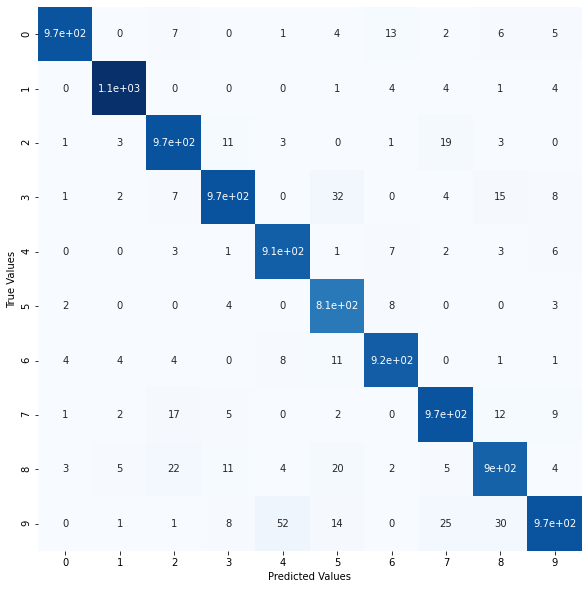

In [35]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(test_images) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(test_labels, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

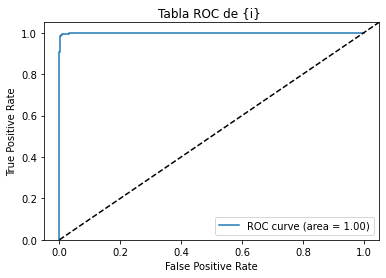

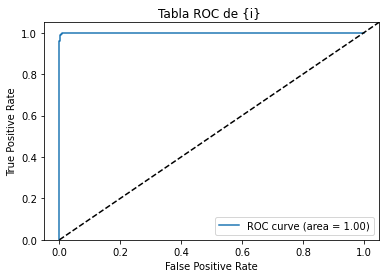

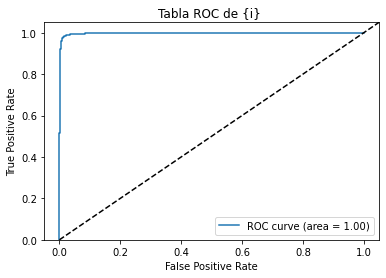

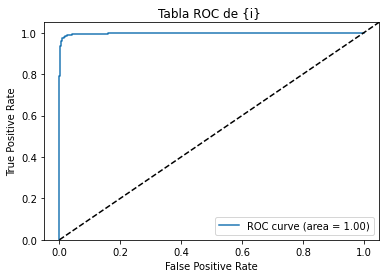

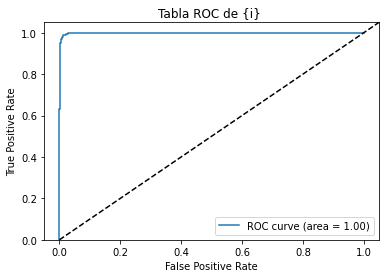

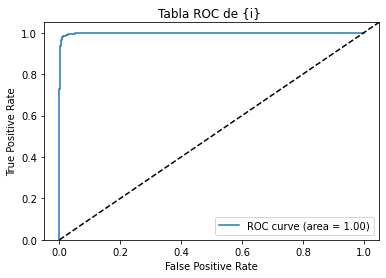

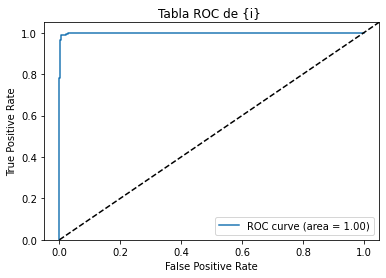

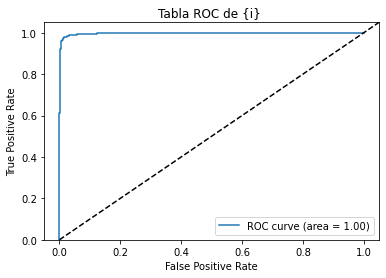

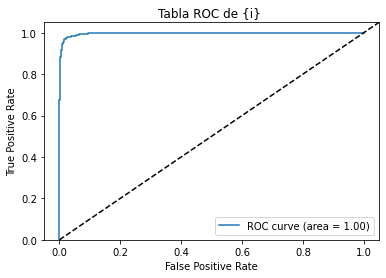

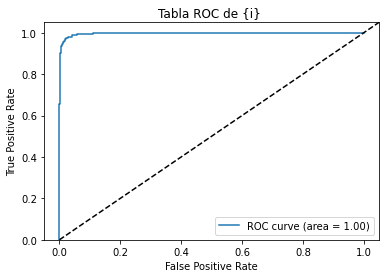

In [36]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

#https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

#y_pred = model.predict(test_images) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


fpr=dict()
tpr=dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(10):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)'% roc_auc[2])
    plt.plot([0, 10], [0, 10], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Tabla ROC de {i} ')
    plt.legend(loc="lower right")
    plt.show()

## Resultados

Usar ambos hiperparámetros parece ser lo que mejores resultados rinde, es la red que mejor reduce overfitting y no sacrifica mucha precisión a comparación de la red con regularización (pero si con dropout). El accuracy sube un poco mas que con regularización, y aun tenemos un dígito que sea mucho peor clasificado que los demás (el 9 en esta prueba). 

Las tablas de ROC ya muestran diferencias mas notables entre dígitos, como la del 8. Finalmente, sobre overfitting, esta es la mas prometedora a reducir overfitting. Hay una diferencia de precisión de poco mas de 4% entre el conjunto de entrenamiento y de prueba. Muy buena señal de que casi no hay overfitting.

# Con Adam 

In [37]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'
                        , kernel_regularizer=tf.keras.regularizers.l1(l=0.01)
                       ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'
                        , kernel_regularizer=tf.keras.regularizers.l1(l=0.01)
                       ))

In [38]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10, activation='softmax'))

In [39]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 19s 21ms/step - loss: 1.6569 - accuracy: 0.7564
Epoch 2/5
938/938 [==============================] - 20s 21ms/step - loss: 0.6863 - accuracy: 0.8665
Epoch 3/5
938/938 [==============================] - 20s 21ms/step - loss: 0.5850 - accuracy: 0.8927
Epoch 4/5
938/938 [==============================] - 19s 20ms/step - loss: 0.5312 - accuracy: 0.9089
Epoch 5/5
938/938 [==============================] - 19s 20ms/step - loss: 0.5024 - accuracy: 0.9163


In [40]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3551 - accuracy: 0.9587


In [41]:
test_acc

0.9587000012397766

In [42]:
from sklearn.metrics import classification_report

Y_test = np.argmax(test_labels, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(test_images)
T_labels = np.argmax(test_labels,axis=1)
print(classification_report(Y_test, y_pred,  digits=6))

              precision    recall  f1-score   support

           0   0.974747  0.984694  0.979695       980
           1   0.990274  0.986784  0.988526      1135
           2   0.952427  0.950581  0.951503      1032
           3   0.930277  0.964356  0.947010      1010
           4   0.978836  0.941955  0.960042       982
           5   0.957589  0.961883  0.959732       892
           6   0.970711  0.968685  0.969697       958
           7   0.955534  0.940661  0.948039      1028
           8   0.940635  0.943532  0.942081       974
           9   0.935039  0.941526  0.938272      1009

    accuracy                       0.958700     10000
   macro avg   0.958607  0.958466  0.958460     10000
weighted avg   0.958895  0.958700  0.958721     10000



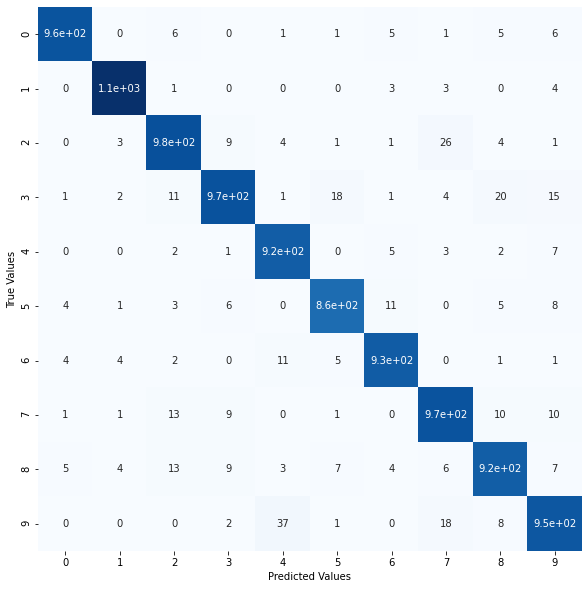

In [43]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(test_images) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(test_labels, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

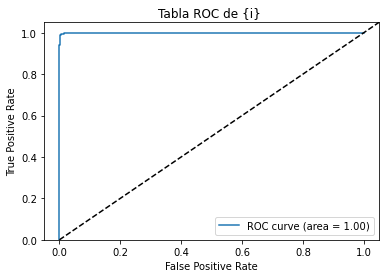

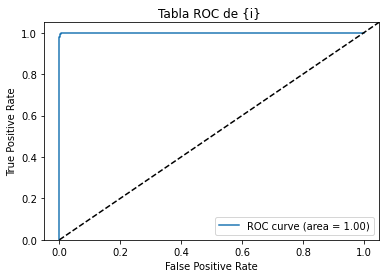

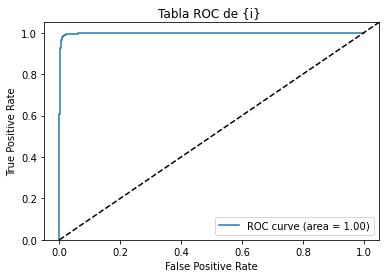

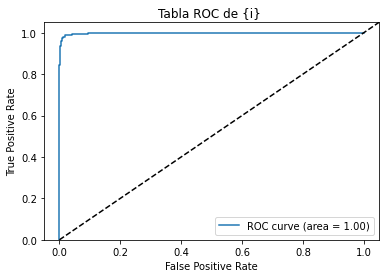

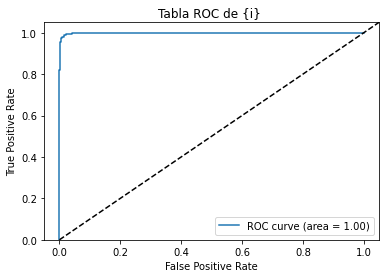

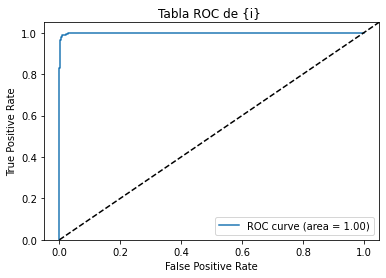

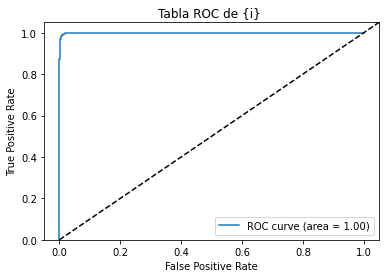

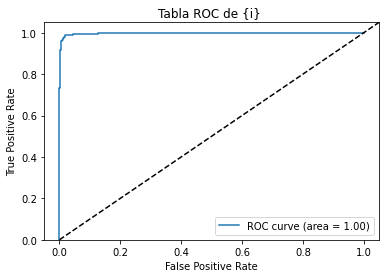

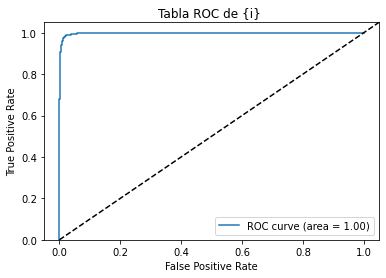

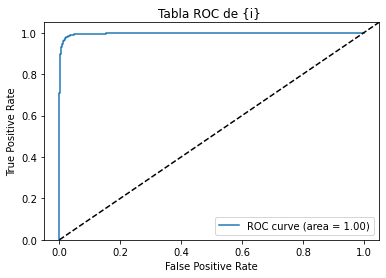

In [44]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

#https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification

#y_pred = model.predict(test_images) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]


fpr=dict()
tpr=dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_labels[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

for i in range(10):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)'% roc_auc[2])
    plt.plot([0, 10], [0, 10], 'k--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Tabla ROC de {i} ')
    plt.legend(loc="lower right")
    plt.show()

## Resultados

Los resultados apuntan a que reemplazar el optimizador por adam fueron mejores a comparación de la red pasada (que incluye dropout y regularización). Tenemos mejor presición y aun menos overfitting. También parece que no aparece un dígito que tenga mucha peor precisión que los otros (nninguno tiene menos de 93% cuando antes habían casos de dígitos con 88%)

Podemos ver que estos hiperparámetros si causan una disminucaión notable en overfitting. Implementarlos si es mejor opción a no usarlos, incluso si el accuracy no sea tan alto. Para comparar la eficiencia de cada hiperparámetro de forma mas precisa, se podrían realizar pruebas con diferentes valores de cada uno. 

Se puede concluir que una mejor precisión no siempre es mejor, también hay observar otras métricas para determinar el desepaño de una red neuronal convolucional. Estos resultados podrían ser mas notables con un conjunto de datos mucho mas grande. 